In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import cv2
import glob
import tifffile as tiff
import matplotlib.pyplot as plt

In [2]:
image_list = []
code = []

for filename in glob.glob('R_LCA/*.tiff'):
    img = tiff.imread(filename)
    image_list.append(img)
    code.append(os.path.basename(filename).split('.tiff')[0])
    print(filename)
    

R_LCA\ADM001_Tmap_T15_R_LCA.tiff
R_LCA\ADM004_Tmap_T15_R_LCA.tiff
R_LCA\CTA002_Tmap_T15_R_LCA.tiff
R_LCA\CTA003_Tmap_T15_R_LCA.tiff
R_LCA\CTA004_Tmap_T15_R_LCA.tiff
R_LCA\ESP001_Tmap_T15_R_LCA.tiff
R_LCA\ESP002_Tmap_T15_R_LCA.tiff
R_LCA\ESP003_Tmap_T15_R_LCA.tiff
R_LCA\ESP006_Tmap_T15_R_LCA.tiff
R_LCA\ESP008_Tmap_T15_R_LCA.tiff
R_LCA\ESP009_Tmap_T15_R_LCA.tiff
R_LCA\ESP010_Tmap_T15_R_LCA.tiff
R_LCA\ESP011_Tmap_T15_R_LCA.tiff
R_LCA\EST004_Tmap_T15_R_LCA.tiff
R_LCA\EXT003_Tmap_T15_R_LCA.tiff
R_LCA\MED001_Tmap_T15_R_LCA.tiff
R_LCA\MED002_Tmap_T15_R_LCA.tiff
R_LCA\MED006_Tmap_T15_R_LCA.tiff
R_LCA\NRT001_Tmap_T15_R_LCA.tiff
R_LCA\NRT002_Tmap_T15_R_LCA.tiff
R_LCA\NRT003_Tmap_T15_R_LCA.tiff
R_LCA\NRT004_Tmap_T15_R_LCA.tiff


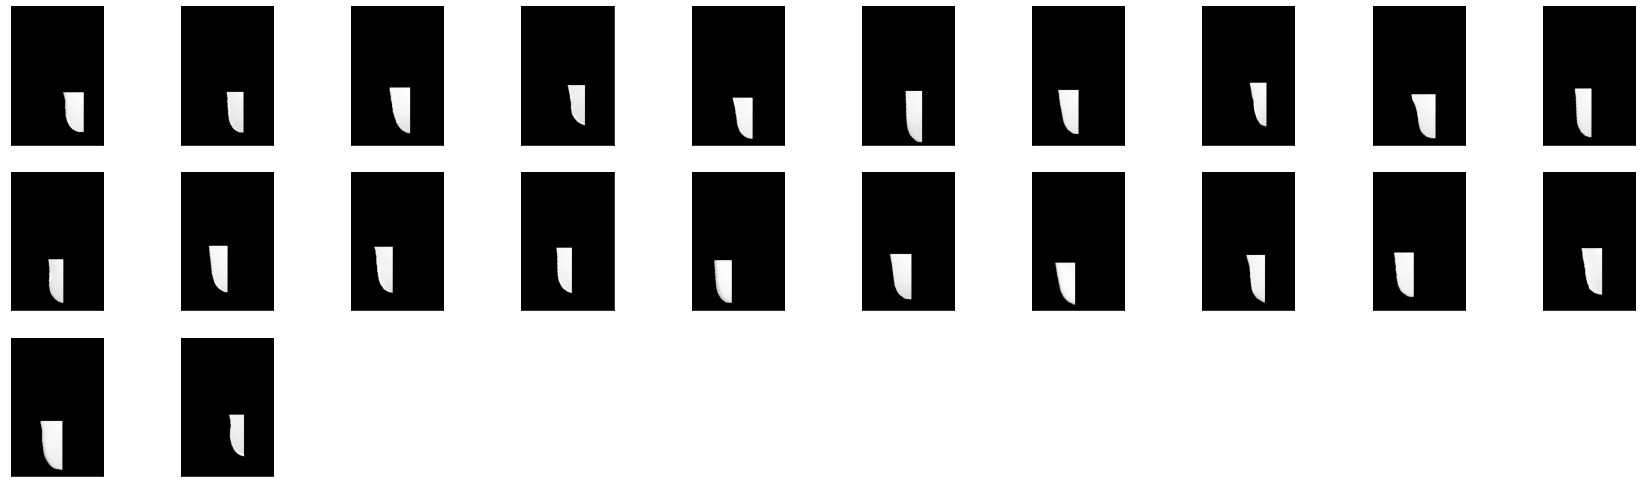

In [3]:
# Plot image for checking purposes
# Specify the overall grid size
plt.figure(figsize=(30,30)) 

for i in range(len(image_list)):
    # The number of images in the grid is 22 distributed in a 10 by 10 matrix
    plt.subplot(10,10,i+1)    
    plt.imshow(image_list[i], cmap=plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
# Extract mean value for each angiosome on each image
# Define list in which data will be stored
R_LCA_mean = []
R_LCA_std = []
R_LCA_max = []
R_LCA_min = []
R_LCA_skew = []
R_LCA_kurtosis = []
R_LCA_img = []

subject = []

for i in range(len(image_list)):
    # Save image as array
    img = np.asarray(image_list[i][image_list[i] > 0])
    R_LCA_img.append(img)
    # Mean value
    img_mean = np.mean(image_list[i][image_list[i] > 0])   
    R_LCA_mean.append(img_mean)
    # Standard deviation 
    img_std = np.std(image_list[i][image_list[i] > 0])   
    R_LCA_std.append(img_std)
    # Maximum value
    img_max = np.max(image_list[i][image_list[i] > 0])   
    R_LCA_max.append(img_max)
    # Minimum value
    img_min = np.min(image_list[i][image_list[i] > 0])   
    R_LCA_min.append(img_min)
    # Skew
    img_skew = skew(image_list[i][image_list[i] > 0])   
    R_LCA_skew.append(img_skew)
    # Kurtosis
    img_kurtosis = kurtosis(image_list[i][image_list[i] > 0])   
    R_LCA_kurtosis.append(img_kurtosis)
    # Subject
    subject.append(code[i])
    print(subject[i], R_LCA_mean[i], R_LCA_std[i], R_LCA_max[i], R_LCA_min[i], R_LCA_skew[i], R_LCA_kurtosis[i])   


ADM001_Tmap_T15_R_LCA 25.79883 3.3509064 28.72833 0.12731895 -4.852107292474916 28.12160519708257
ADM004_Tmap_T15_R_LCA 19.205894 2.6629608 22.62256 0.065047905 -4.597789953199618 25.087423642674572
CTA002_Tmap_T15_R_LCA 22.684315 3.124242 25.342972 0.30031723 -4.4250817454334195 23.23304359431253
CTA003_Tmap_T15_R_LCA 23.048622 1.7619952 27.16437 0.06921322 -4.795654616102961 39.86876254682346
CTA004_Tmap_T15_R_LCA 20.964403 2.878341 23.15086 0.061923925 -4.95529448437393 27.03067896975535
ESP001_Tmap_T15_R_LCA 23.44963 3.450214 27.264338 0.12107098 -3.882614262732048 18.97071463171447
ESP002_Tmap_T15_R_LCA 23.997322 3.3547783 27.001461 0.11014873 -4.487216078811783 23.76503288026289
ESP003_Tmap_T15_R_LCA 25.78879 3.9575639 29.474268 0.39875722 -4.20114593793702 19.877694447222176
ESP006_Tmap_T15_R_LCA 23.121408 3.1357584 26.185522 0.12107098 -4.580200099682453 25.303515804170917
ESP008_Tmap_T15_R_LCA 23.064621 3.373401 26.29359 0.08534211 -4.332784659254535 22.055533975802692
ESP009_

In [5]:
# Initialize data of lists
data = {'Subject': subject,
        'R_LCA_mean': R_LCA_mean, 
        'R_LCA_std': R_LCA_std,
        'R_LCA_max': R_LCA_max,
        'R_LCA_min': R_LCA_min,
        'R_LCA_skew': R_LCA_skew,
        'R_LCA_kurtosis': R_LCA_kurtosis}
  
# Create DataFrame
df = pd.DataFrame(data)
display(df)

df.to_csv('R_LCA.csv', index=False) 

,Subject,R_LCA_mean,R_LCA_std,R_LCA_max,R_LCA_min,R_LCA_skew,R_LCA_kurtosis
0,ADM001_Tmap_T15_R_LCA,25.798830,3.350906,28.728331,0.127319,-4.852107,28.121605
1,ADM004_Tmap_T15_R_LCA,19.205894,2.662961,22.622561,0.065048,-4.597790,25.087424
2,CTA002_Tmap_T15_R_LCA,22.684315,3.124242,25.342972,0.300317,-4.425082,23.233044
3,CTA003_Tmap_T15_R_LCA,23.048622,1.761995,27.164370,0.069213,-4.795655,39.868763
4,CTA004_Tmap_T15_R_LCA,20.964403,2.878341,23.150860,0.061924,-4.955294,27.030679
5,ESP001_Tmap_T15_R_LCA,23.449631,3.450214,27.264338,0.121071,-3.882614,18.970715
6,ESP002_Tmap_T15_R_LCA,23.997322,3.354778,27.001461,0.110149,-4.487216,23.765033
7,ESP003_Tmap_T15_R_LCA,25.788790,3.957564,29.474268,0.398757,-4.201146,19.877694
8,ESP006_Tmap_T15_R_LCA,23.121408,3.135758,26.185522,0.121071,-4.580200,25.303516
9,ESP008_Tmap_T15_R_LCA,23.064621,3.373401,26.293591,0.085342,-4.332785,22.055534


In [6]:
# Total values for this angiosome
# Concatenate all data for extracting parameters
R_LCA_all = np.concatenate((R_LCA_img[0],R_LCA_img[1],R_LCA_img[2],R_LCA_img[3],R_LCA_img[4],R_LCA_img[5],
                            R_LCA_img[6],R_LCA_img[7],R_LCA_img[8],R_LCA_img[9],R_LCA_img[10],R_LCA_img[11],
                            R_LCA_img[12],R_LCA_img[13],R_LCA_img[14],R_LCA_img[15],R_LCA_img[16],R_LCA_img[17],
                            R_LCA_img[18],R_LCA_img[19],R_LCA_img[20],R_LCA_img[21]))
R_LCA_all_mean = np.mean(R_LCA_all)
R_LCA_all_std = np.std(R_LCA_all)
R_LCA_all_max = np.max(R_LCA_all)
R_LCA_all_min = np.min(R_LCA_all)
R_LCA_all_skew = skew(R_LCA_all)
R_LCA_all_kurtosis = kurtosis(R_LCA_all)

# Initialize data of lists
data2 = {'Variables':['R_LCA_all_mean', 'R_LCA_all_std', 'R_LCA_all_max', 'R_LCA_all_min', 'R_LCA_all_skew', 
                      'R_LCA_all_kurtosis'],
         'Values': [R_LCA_all_mean, R_LCA_all_std, R_LCA_all_max, R_LCA_all_min, R_LCA_all_skew, R_LCA_all_kurtosis]}
  
# Create DataFrame
df2 = pd.DataFrame(data2)
display(df2)

df2.to_csv('R_LCA_all.csv', index=False) 


,Variables,Values
0,R_LCA_all_mean,23.510506
1,R_LCA_all_std,3.924188
2,R_LCA_all_max,30.203201
3,R_LCA_all_min,0.056717
4,R_LCA_all_skew,-2.489363
5,R_LCA_all_kurtosis,10.838014


In [7]:
a_file = open("R_LCA.txt", "w")
np.savetxt(a_file, R_LCA_all)
a_file.close()